## EXPLORATORY DATA ANALYSIS : STACK OVERFLOW DEVELOPER SURVEY

Analysing responses from the Stack Overflow Annual Developer Survey 2020

## Introduction

I m using the StackOverflow developere survey dataset for analysis. This is an annual survey conducted by StackOverflow.

## Download the Dataset

I have downloaded the dataset from this url https://insights.stackoverflow.com/survey and unzip it and pasted the folder on my project folder. 

There are other ways also to download the dataset using the **urlretrieve** if we have the direct url for the raw data.

In [1]:
import os

Lets look at the files that are stored in the extracted folder "developer_survey_2020" (2 CSV Files)

In [2]:
os.listdir("developer_survey_2020")

['README_2020.txt',
 'so_survey_2020.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

## Load the Dataset

Lets load the csv files with the help of pandas library in our notebook and have a glance at it. 

In [3]:
import pandas as pd

In [4]:
survey_raw = pd.read_csv('developer_survey_2020/survey_results_public.csv')

In [5]:
survey_raw

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains 64,461 rows which are responses to 60 questions(columns) and an extra column for the respondant id or index. 

Lets look at the columns of dataframe.

In [6]:
survey_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

These are the short code or aliases used for the questions asked, which can be found in the schema dataset (other csv dataset). 

Let take a look at that dataset.

In [7]:
pd.read_csv("developer_survey_2020/survey_results_schema.csv")

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


Lets remove the index and change the index to column(which has code) to make it easy to access the questions. Also converting the dataframe into Series since theree is only one column(QuestionText).

In [8]:
schema_raw = pd.read_csv("developer_survey_2020/survey_results_schema.csv", index_col = 'Column').QuestionText

In [9]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [10]:
schema_raw['MainBranch']

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

Loaded the dataset and ready to work some preprocessing and analysis on it.

## Data Preparation & Cleaning

This survey has a lot of information but I have focused my analysis on the 3 main areas(and more if i find insights) :
* Demographics of the survey respondants & the global programming community
* Distribution of programming skills, experience and preferences
* Employment-related information, preferences and opinions



In [11]:
columns_req = ['Country','Age','Gender','EdLevel','UndergradMajor',
    'Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck',
    'Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NEWOvertime','NEWEdImpt']

Columns that I have selected for the analysis on the basis of the 3 areas. Now I will create a copy of the dataframe with these columns only.

In [12]:
survey_df = survey_raw[columns_req].copy()

In [13]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


So, we have selected about 20 columns. Now lets select the same columns from the schema dataframe.

In [14]:
schema_df = schema_raw[columns_req].copy()
schema_df

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [15]:
print("Shape of schema_df :", schema_df.shape)
print("Shape of survey_df :", survey_df.shape)


Shape of schema_df : (20,)
Shape of survey_df : (64461, 20)


In [16]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Here, almost all the columns have object data type which means they contain values of different data types(or contain NaN values). 

Only two columns has float data type **(Age and WorkWeekHrs)**. Lets convert few more columns into numeric data types(which has more numeric data than other) to make our analysis easier.

In [17]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')



In [18]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be an **data entry error** in the **Age column** as the mininmum age is 1 and maximum age is 279 which is practically impossible.

 A simple fix would be to ignore the rows where the age is less than 10 years and higher than 100 years.

In [19]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

Droped the rows where work hours per week is greater than 140 hours. Because more than that would be logically and somehow practically impossible.

In [20]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index, inplace = True)

In [21]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

Looking at the gender column and do some small simplification.

In [22]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

There are basically three values for Gender i.e **Man**, 
**Woman**, 
**Non-binary, genderqueer, or gender non-conforming**.

We are going to replace the rest of the values where multiple options has been selected with NaN values.(Simplification)

In [23]:
import numpy as np

In [24]:
survey_df.Gender.where(~(survey_df.Gender.str.contains(";", na = False)), np.nan, inplace=True)

Now, we have cleaned and prepared the dataset for analysis. Lets look at few samples of survey_df dataframe. 

In [25]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
24157,United States,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,Yes,17.0,9.0,6.0,HTML/CSS;JavaScript;PHP;VBA,C;C#;C++;Java;SQL;Swift,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end",38.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
27108,France,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,15.0,9.0,4.0,C;C#;C++;HTML/CSS;Java;JavaScript;Kotlin;PHP;S...,C#;C++;Dart;Java;Kotlin;TypeScript,Every few months,Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, embedded applic...",55.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Very important
54239,Turkey,20.0,Man,Some college/university study without earning ...,Web development or web design,Yes,16.0,5.0,4.0,HTML/CSS;JavaScript;PHP,HTML/CSS;JavaScript;PHP,Once a year,Play games;Call a coworker or friend;Go for a ...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",10.0,Slightly dissatisfied,Financial performance or funding status of the...,Often: 1-2 days per week or more,Not at all important/not necessary
16190,United States,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,9.0,2.0,Go;HTML/CSS;JavaScript;SQL;TypeScript,Go;HTML/CSS;JavaScript;Objective-C;Swift;TypeS...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Fairly important
18912,United States,26.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",No,19.0,4.0,3.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;HTML/CSS;Python;SQL,Once a year,Call a coworker or friend;Watch help / tutoria...,Employed full-time,"Developer, back-end;Developer, QA or test;DevO...",40.0,Very satisfied,Diversity of the company or organization;Flex ...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
6864,India,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,20.0,7.0,5.0,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",45.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Fairly important
1231,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",No,16.0,9.0,5.0,C#;Java;JavaScript;SQL;TypeScript,C#;Go;Java;Scala;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,Flex time or a flexible schedule;Specific depa...,Never,Very important
6230,Nepal,33.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,18.0,14.0,10.0,Bash/Shell/PowerShell;C++;HTML/CSS;Java;JavaSc...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,"Independent contractor, freelancer, or self-em...",Data or business analyst;Database administrato...,60.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than 

## Exploratory Analysis and Visualization

Before we start to look into interesting insights, lets first understand the demographics i.e. Country, Age, Gender, Education level, Employment level etc of the respondants. 

Lets begin by importing **matplotlib.pyplot** and **seaborn**


In [26]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

* ### Country

Lets look at the number of countries from which there are responses in the survey, and plot the 10 countries with the highest number of responses.

In [27]:
schema_df.Country

'Where do you live?'

In [28]:
survey_df.Country.nunique()


183

In [29]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12468
India                  8393
United Kingdom         3894
Germany                3879
Canada                 2189
France                 1893
Brazil                 1811
Netherlands            1340
Poland                 1263
Australia              1208
Spain                  1160
Italy                  1115
Russian Federation     1091
Sweden                  884
Pakistan                808
Name: Country, dtype: int64

These are the **15 countries** with highest number of respondants. Lets visualize them using bar chart.

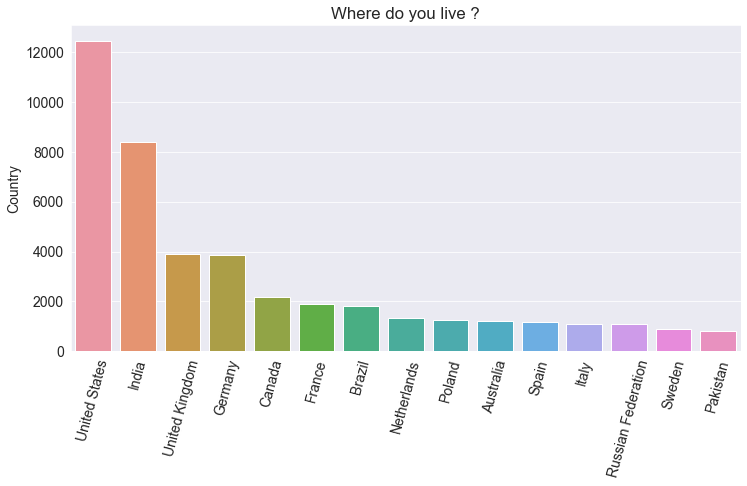

In [30]:
plt.figure(figsize = (12,6))
plt.xticks(rotation  = 75)
plt.title("Where do you live ?")
sns.barplot(top_countries.index, top_countries)


It appears that a disproportionality high number of respondants are from USA and India - which has the highest population in the world(apart from China) and since the survey is in English i.e common languages used by professionals in USA, India and UK. We can see that there is issue of **selection bias** due to Population and Language (English).

**Finding the percentage of responses from English-speaking vs. non-English speaking countries.**

In [31]:
# Using the countries_languages.csv dataset downloaded from github
languages = pd.read_csv("countries-languages.csv", index_col=["Country"])
languages = languages[languages.index.isin(survey_df.Country.unique())]
english_speak = languages["Languages Spoken"].where(languages["Languages Spoken"].str.contains("English", na = False))

In [32]:
# Merge the languages table and survey_df table 
df = pd.merge(survey_df,english_speak, how="left", on = "Country")
df_english = df[df["Languages Spoken"].notnull()]
print("Total Responses from the country speaking English:", df_english.shape[0])

Total Responses from the country speaking English: 38862


In [33]:
print("Percentage of English-speaking Countries Responses : ", ((df_english.shape[0]/survey_df.shape[0])*100) )

Percentage of English-speaking Countries Responses :  60.43293005318322


We can clearly see why there is a selection bias. Almost **60%** of responses are from the **english-speaking** countries.

* ### Age

The distribution of Age of respondants is another important factor to look at.

In [34]:
schema_df.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

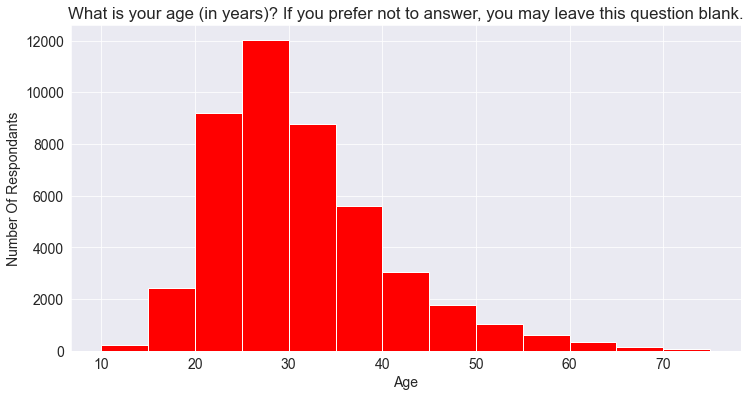

In [35]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Age)
plt.xlabel("Age")
plt.ylabel("Number Of Respondants")
plt.hist(survey_df.Age, bins=np.arange(10,80,5),color="red");

It appears that a large percentage of respondants are in the age range of 20-45. So a lot people have taken up Computer as their field of study or profession in the last 20 years.

* ### Gender

Lets look at the distribution of responses for the Gender. 

In [36]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [37]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

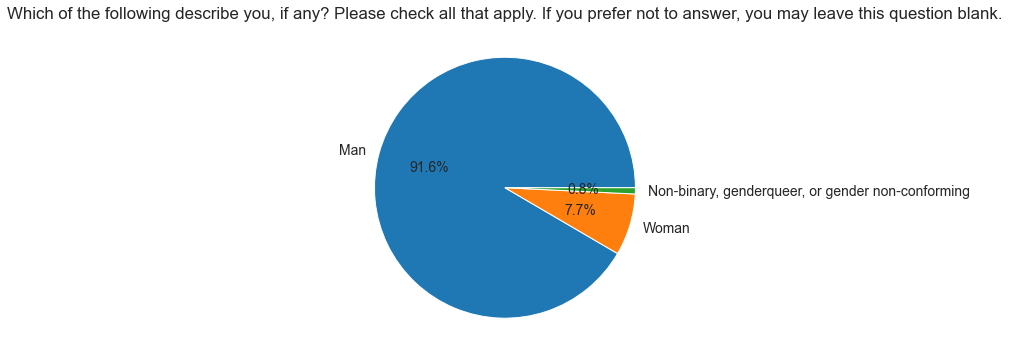

In [38]:
plt.figure(figsize = (12,6))
plt.title(schema_df.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = "%1.1f%%");

Only about 8% of the respondants who chose to answer the question identify as woman or non-binary.

**Finding the relative education levels differ across genders.**

In [39]:
# Grouping up by gender and counting the EdLevel and converting the result into a Dataframe
df1 = pd.DataFrame(survey_df.groupby("Gender").EdLevel.value_counts().reset_index(name="Value_count"))

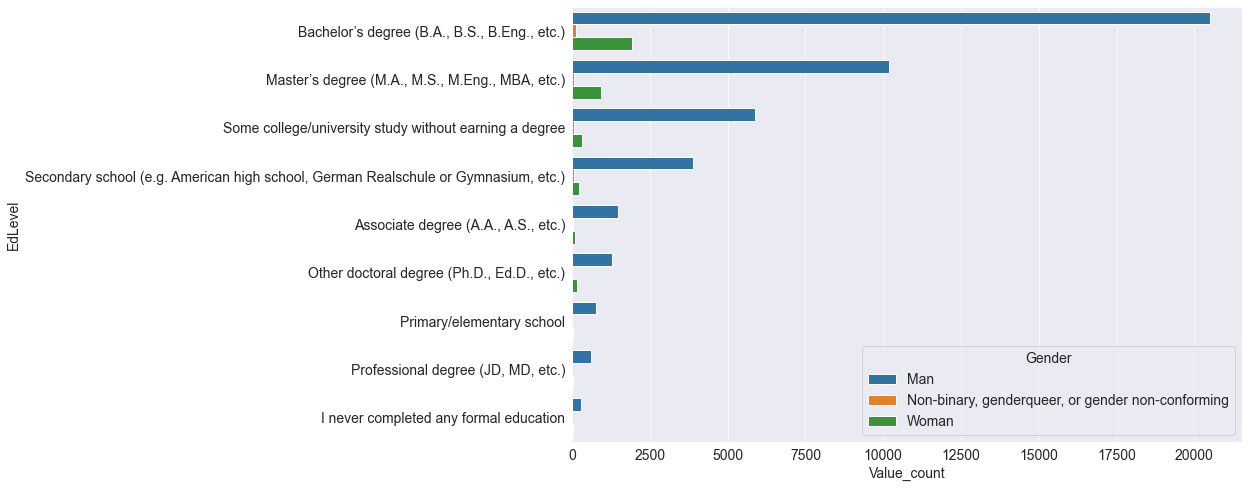

In [40]:
# Plotting in a bar chart
plt.figure(figsize=(12,8))
sns.barplot("Value_count", "EdLevel", data=df1, hue = "Gender");

From the graph, we can see that maximum number of womens i.e. (less than 2500) have Only Bachelor's Degree as their highest education as compared to mens.

If we see the non-binary, genderqueer or gender non-conforming, they are even worse i.e (only about few hundreds)

Therefore, we should encourage womens and non-binary genders to come forward and take part in the community as much as they can. 

* ### Education Level

Formal education in computer science is often considered an important requirement of becoming a programmer. Lets see if this indeed the case.

In [41]:
schema_df.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

Lets use a countplot to visualize the question

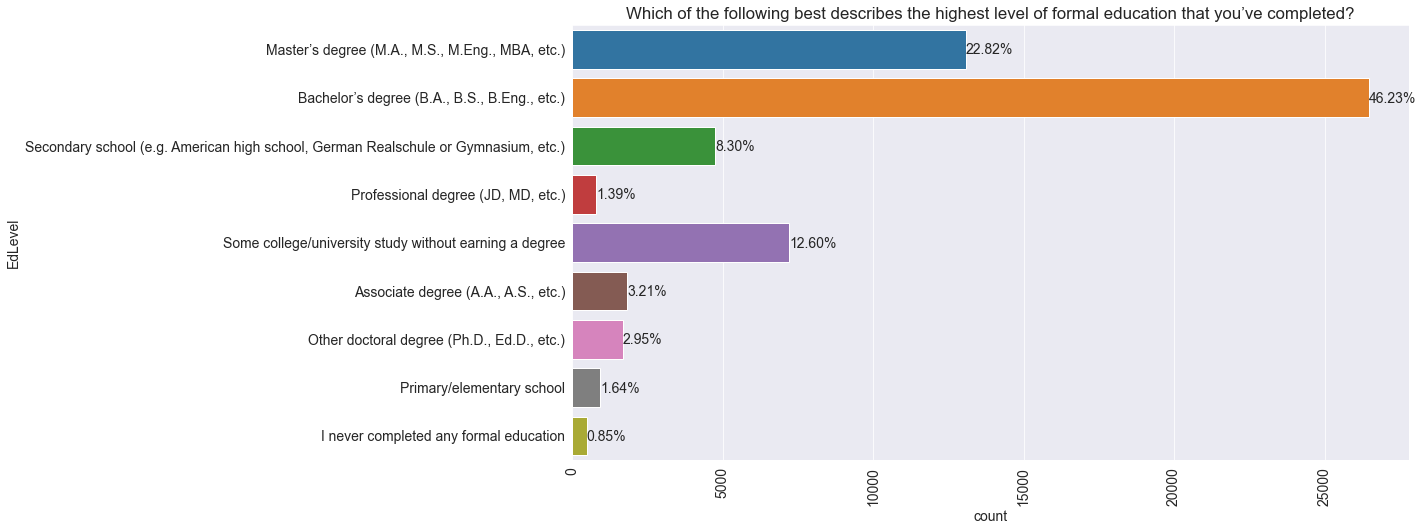

In [42]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y="EdLevel", data=survey_df);
plt.xticks(rotation=90)
plt.title(schema_df.EdLevel);

x = 0
for p in ax.patches:
    ax.text(p.get_width(), x+p.get_height()-0.7, "{:1.2f}%".format((p.get_width()/survey_df.EdLevel.count())*100))
    x+=1


It appears that over half of the respondants hold a **bachelor's (46.23%)** or **master's degree (22.82%)**. So most programmers definitely seem to have some college education.

Lets also take a glimpse on the **Undergraduate Majors (column)**, but this time we will convert the numbers into percentages, and sort by percentage values to make it easier to visualize the order.

In [43]:
schema_df.UndergradMajor

'What was your primary field of study?'

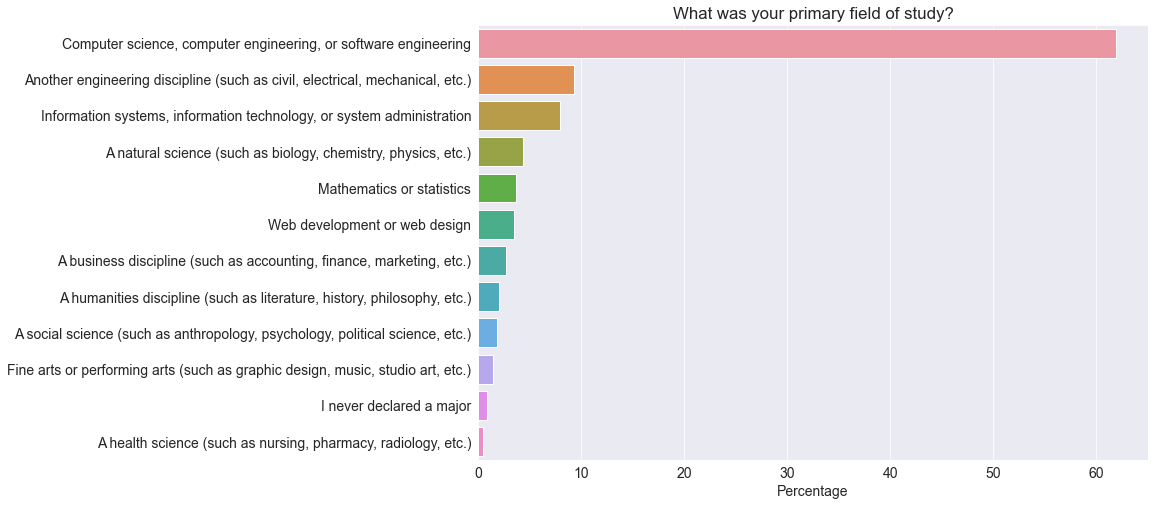

In [44]:
percentage =  survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

plt.figure(figsize=(12,8))
sns.barplot(percentage, percentage.index);
plt.title(schema_df.UndergradMajor);
plt.xlabel("Percentage");


Its appears that more than **60%** holding a college degree have a field of study of Computer Science, and the rest **40%** have different field of study. 

This seems to suggest that while college education is helpful in general, but one doesnt need to pursue a major in CS to become a successful programmer.

**Analyzing the results of the NEWEdImpt column for respondants who hold some college degree vs. those who dont.**

In [45]:
df_Impt = pd.DataFrame(survey_df.groupby(['UndergradMajor']).NEWEdImpt.value_counts().reset_index(name = "Count"))

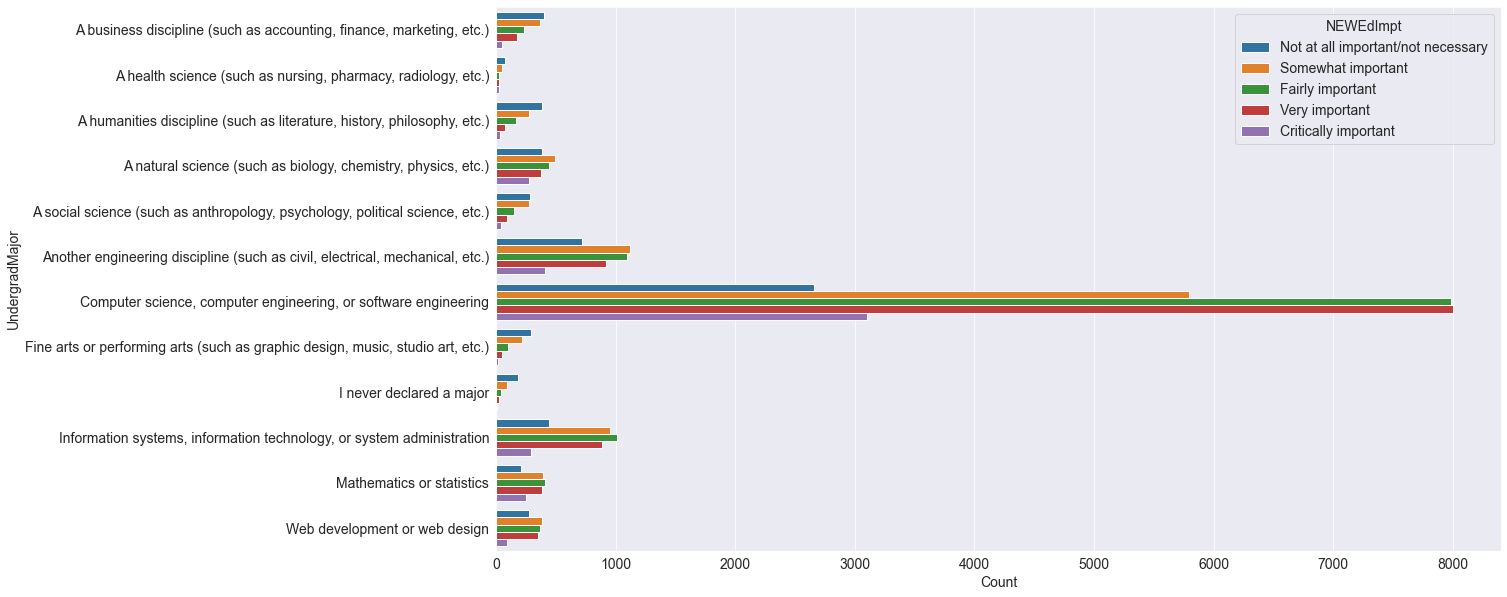

In [46]:
plt.figure(figsize=(18,10))
sns.barplot(y="UndergradMajor",x="Count",hue="NEWEdImpt", data=df_Impt);

It appears that respondants from almost every field of study which is somewhat close to Computer Science has given **fairly** or **somewhat** importance to the formal education leaving out the respondants who have done majors in CS itself have chosen **Very Important** to have a formal education

* ### Employment

Freelancing and contract work is a common choice among programmer, so it would be interesting to compare the breakdown between full time, part time and freelance work.

In [47]:
schema_df.Employment

'Which of the following best describes your current employment status?'

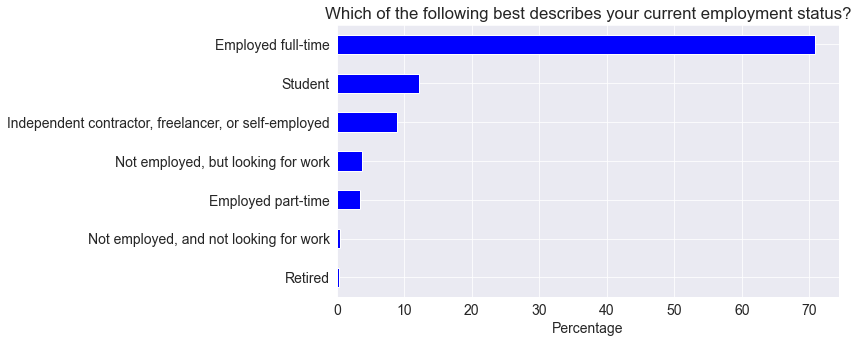

In [48]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind = "barh",color = 'blue');
plt.title(schema_df.Employment);
plt.xlabel("Percentage");

It appears that close to 10% of respondants are employed part time or as freelancers. 

The **DevType** field contains informsation about the roles held by respondants. Lets look at the respective question on this.

In [49]:
schema_df.DevType

'Which of the following describe you? Please select all that apply.'

In [50]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

It seems that a lot of people have picked multiple options separated by **;**, so it will make our analysis a little bit harder. And there are a lot of options as well. 

Lets define a **helper function** which turns a column containing list of values into a dataframe with columns for each possible values.

In [51]:
def multi_col(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(";"):
            if not option in result_df.columns:
                options.append(option)
                result_df[option]=False
            result_df.at[idx, option] = True
    return result_df[options]


In [52]:
devtype_df = multi_col(survey_df.DevType)
devtype_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Finding out the most common roles.**

Using the column-wise totals to identify as True (int value = 1) and False(int value = 0)

In [107]:
devtype_count = devtype_df.sum().sort_values(ascending = False)
devtype_count

Developer, back-end                              27137
Developer, full-stack                            27046
Developer, front-end                             18230
Developer, desktop or enterprise applications    11742
Developer, mobile                                 9447
DevOps specialist                                 5949
Database administrator                            5697
Designer                                          5307
System administrator                              5221
Developer, embedded applications or devices       4729
Data or business analyst                          4008
Data scientist or machine learning specialist     3974
Developer, QA or test                             3926
Engineer, data                                    3729
Academic researcher                               3534
Educator                                          2916
Developer, game or graphics                       2778
Engineering manager                               2714
Product ma

As we can see the **Developer role** is the most common role.

**Finding the percecntage of respondants work in particular roles**

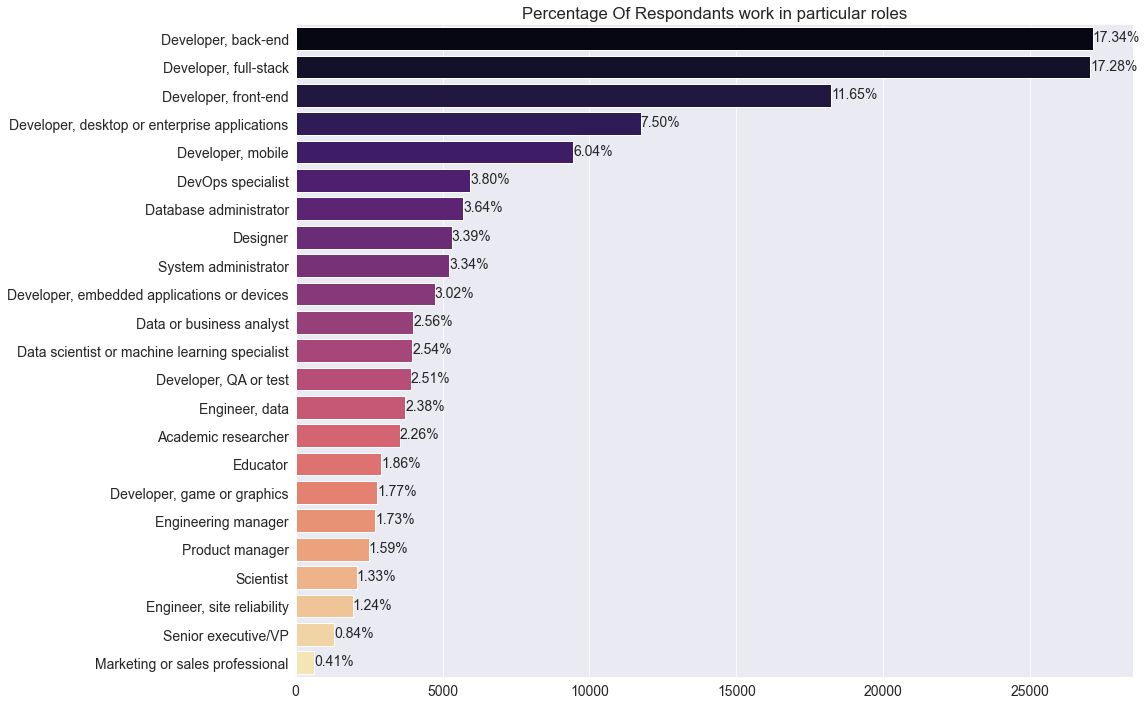

In [84]:
plt.figure(figsize=(15,12))
plt.title("Percentage Of Respondants work in particular roles");
ax = sns.barplot(y=devtype_count.index,x=devtype_count, palette="magma");

x = 0
for p in ax.patches:
    ax.text(p.get_width(),x+p.get_height()/8, "{:0.2f}%".format(p.get_width()*100/devtype_count.sum()))
    x+=1

Only about **5%** respondants have a role in Data Science field (i.e **Data or business analyst and Data Scientist or ML specialist) whereas almost **50% or more** respondants have a common role of a **Developer** which seems pretty obvious because stackoverflow is mainly used mostly by developers. 

** Finding the highest percentage of women in a particualar role.**

In [121]:
df_woman = devtype_df.loc[ survey_df[survey_df.Gender == "Woman"].index].sum()

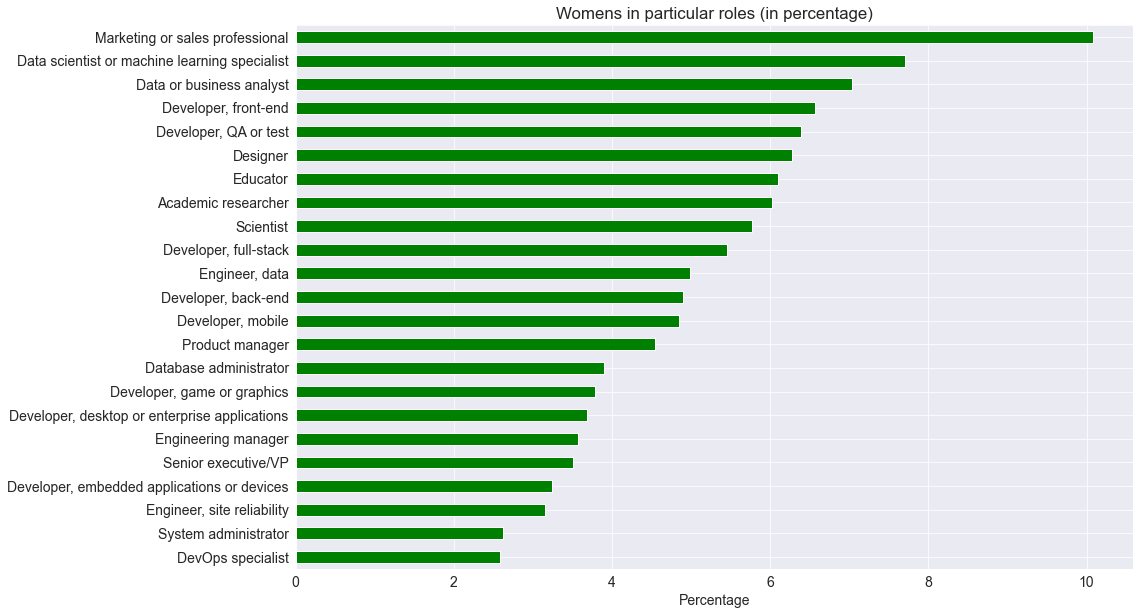

In [131]:
plt.figure(figsize=(15,10))
((df_woman*100/devtype_df.sum()).sort_values(ascending=True)).plot(kind="barh", colormap="ocean");
plt.title("Womens in particular roles (in percentage)");
plt.xlabel("Percentage");


It appears that the highest percentage of women is in **Marketing or Sales professional** with **more than 10%** of womens in the field. 

## Asking and Answering Questions

We have already gained several insights about the respondants and the programming community simply by exploring individual columns of the dataset. 

Lets ask some specific questions, and answer them using data frame operations and interesting visualizations.

